Data source - https://www.livefutbol.com

In [30]:
import pandas as pd
import numpy as np
import math

pd.set_option('display.max_columns', None)

df_01 = pd.read_csv('../data/LigaMX/mex-primera-division-2023-2024-apertura.csv')


# Join the two seasons together

df = pd.concat([df_01,
                #df_23,
                #df_22,
                #df_21
                     ], ignore_index=True)

df   

,Unnamed: 0,date,time,torneo,team_home,team_away,score,final_score_home,final_score_away,halftime_score_home,halftime_score_away
0,0,01.07.2023,03:00,apertura,CF América,FC Juárez,1:2 (1:0),1.0,2.0,1.0,0.0
1,1,NaN,03:00,apertura,Mazatlán FC,CF Pachuca,1:1 (0:1),1.0,1.0,0.0,1.0
2,2,NaN,05:10,apertura,Club Tijuana,Pumas UNAM,2:3 (1:1),2.0,3.0,1.0,1.0
3,3,02.07.2023,01:00,apertura,Atlético San Luis,CF Monterrey,1:1 (0:1),1.0,1.0,0.0,1.0
4,4,NaN,03:00,apertura,UANL Tigres,Puebla FC,1:1 (0:0),1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
148,148,NaN,00:00,apertura,Gallos Blancos,CF Monterrey,0:0 (0:0),0.0,0.0,0.0,0.0
149,149,NaN,02:00,apertura,Pumas UNAM,Deportivo Guadalajara,1:0 (1:0),1.0,0.0,1.0,0.0
150,150,NaN,04:10,apertura,UANL Tigres,CF América,0:0 (0:0),0.0,0.0,0.0,0.0
151,151,13.11.2023,01:00,apertura,Cruz Azul,Puebla FC,1:2 (1:1),1.0,2.0,1.0,1.0


In [31]:
def check_date(value):
    if isinstance(value, (int, float)):
        return math.isnan(value)
    else: 
        return False

In [32]:
## add date to missing values (missing since it is the same date and the web page saves the date only for the first game)
curr_date = df['date'][0]
idx = 0
for date in df['date']:
     if check_date(date):
        date = curr_date
        df.loc[idx, "date"] = date
        #df['date'][idx] = date
     else:
          curr_date = df['date'][idx]
     idx = idx + 1
df

,Unnamed: 0,date,time,torneo,team_home,team_away,score,final_score_home,final_score_away,halftime_score_home,halftime_score_away
0,0,01.07.2023,03:00,apertura,CF América,FC Juárez,1:2 (1:0),1.0,2.0,1.0,0.0
1,1,01.07.2023,03:00,apertura,Mazatlán FC,CF Pachuca,1:1 (0:1),1.0,1.0,0.0,1.0
2,2,01.07.2023,05:10,apertura,Club Tijuana,Pumas UNAM,2:3 (1:1),2.0,3.0,1.0,1.0
3,3,02.07.2023,01:00,apertura,Atlético San Luis,CF Monterrey,1:1 (0:1),1.0,1.0,0.0,1.0
4,4,02.07.2023,03:00,apertura,UANL Tigres,Puebla FC,1:1 (0:0),1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
148,148,12.11.2023,00:00,apertura,Gallos Blancos,CF Monterrey,0:0 (0:0),0.0,0.0,0.0,0.0
149,149,12.11.2023,02:00,apertura,Pumas UNAM,Deportivo Guadalajara,1:0 (1:0),1.0,0.0,1.0,0.0
150,150,12.11.2023,04:10,apertura,UANL Tigres,CF América,0:0 (0:0),0.0,0.0,0.0,0.0
151,151,13.11.2023,01:00,apertura,Cruz Azul,Puebla FC,1:2 (1:1),1.0,2.0,1.0,1.0


# Selecting only match related columns. 

- Match Statistics (where available)
- Attendance = Crowd Attendance
- Referee = Match Referee
- HS = Home Team Shots
- AS = Away Team Shots
- HST = Home Team Shots on Target
- AST = Away Team Shots on Target
- HHW = Home Team Hit Woodwork
- AHW = Away Team Hit Woodwork
- HC = Home Team Corners
- AC = Away Team Corners
- HF = Home Team Fouls Committed
- AF = Away Team Fouls Committed
- HFKC = Home Team Free Kicks Conceded
- AFKC = Away Team Free Kicks Conceded
- HO = Home Team Offsides
- AO = Away Team Offsides
- HY = Home Team Yellow Cards
- AY = Away Team Yellow Cards
- HR = Home Team Red Cards
- AR = Away Team Red Cards
- HBP = Home Team Bookings Points (10 = yellow, 25 = red)
- ABP = Away Team Bookings Points (10 = yellow, 25 = red)

In [33]:
# Create new rows that we will want to use later for future predictions.
new_rows = {
    'team_home':['CF America', 'Mazatlan FC', 'Club Tiujana', 'Atletico San Luis', 'UANL Tigres', 'Altas Guadalajara'],
    'team_away':['FC Juarez', 'CF Pachuca', 'Pumas UNAM','CF Monterrey', 'Puebla FC', 'Cruz Azul'],
    'year' : [2024]*6,
    'month' : [3]*6,
    'day' : [30, 31, 31, 30, 30, 30],
    'hour': [20, 16, 14, 12, 15, 25],
    'min':[00, 30, 00, 30, 00, 00]
}

In [34]:
df['FTR'] = 'H' #
n = len(df)
for idx in range(0, n-1, 1):
    if df['final_score_home'][idx]<df['final_score_away'][idx]:
        df.loc[idx, 'FTR'] = 'A'
    if df['final_score_home'][idx]==df['final_score_away'][idx]:
        df.loc[idx, 'FTR'] = 'D'

In [35]:
def split_date_day(x):
    if isinstance(x, str):  # Check if x is a string
        return x.split('.')[0]
    else:
        return np.nan  # Return NaN if x is not a string

def split_date_month(x):
    if isinstance(x, str):  # Check if x is a string
        if 0 <= 1< len(x):
            return x.split('.')[1]
    else:
        return np.nan  # Return NaN if x is not a string

def split_date_year(x):
    if isinstance(x, str):  # Check if x is a string
        if 0 <= 2 < len(x):
            return x.split('.')[2]
    else:
        return np.nan  # Return NaN if x is not a string
    
def split_date_hour(x):
    if isinstance(x, str):  # Check if x is a string
        return x.split(':')[0]
    else:
        return np.nan  # Return NaN if x is not a string
    
def split_date_min(x):
    if isinstance(x, str):  # Check if x is a string
        if 0 <= 1< len(x):
           return x.split(':')[1]
    else:
        return np.nan  # Return NaN if x is not a string

In [36]:
df

,Unnamed: 0,date,time,torneo,team_home,team_away,score,final_score_home,final_score_away,halftime_score_home,halftime_score_away,FTR
0,0,01.07.2023,03:00,apertura,CF América,FC Juárez,1:2 (1:0),1.0,2.0,1.0,0.0,A
1,1,01.07.2023,03:00,apertura,Mazatlán FC,CF Pachuca,1:1 (0:1),1.0,1.0,0.0,1.0,D
2,2,01.07.2023,05:10,apertura,Club Tijuana,Pumas UNAM,2:3 (1:1),2.0,3.0,1.0,1.0,A
3,3,02.07.2023,01:00,apertura,Atlético San Luis,CF Monterrey,1:1 (0:1),1.0,1.0,0.0,1.0,D
4,4,02.07.2023,03:00,apertura,UANL Tigres,Puebla FC,1:1 (0:0),1.0,1.0,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...
148,148,12.11.2023,00:00,apertura,Gallos Blancos,CF Monterrey,0:0 (0:0),0.0,0.0,0.0,0.0,D
149,149,12.11.2023,02:00,apertura,Pumas UNAM,Deportivo Guadalajara,1:0 (1:0),1.0,0.0,1.0,0.0,H
150,150,12.11.2023,04:10,apertura,UANL Tigres,CF América,0:0 (0:0),0.0,0.0,0.0,0.0,D
151,151,13.11.2023,01:00,apertura,Cruz Azul,Puebla FC,1:2 (1:1),1.0,2.0,1.0,1.0,A


In [37]:
df = df[df.columns[:12]].copy()
#df.loc[:,'date'] = (df['date'].apply(lambda x:x.split('.')[0])).astype(int)
df.loc[:,'day']  = df['date'].apply(split_date_day)
df.loc[:,'month'] = (df['date'].apply(split_date_month))
df.loc[:,'year'] = (df['date'].apply(split_date_year))
df.loc[:,'hour'] = (df['time'].apply(split_date_hour))
df.loc[:,'min'] = (df['time'].apply(split_date_min))
df = df.drop(columns = ['date', 'time', 'Unnamed: 0'])
df = pd.concat([pd.DataFrame(new_rows), df], ignore_index=True)
df = df.sort_values(by= ['year', 'month', 'day', 'hour']).reset_index(drop = True)


In [38]:
df.head(10)


,team_home,team_away,year,month,day,hour,min,torneo,score,final_score_home,final_score_away,halftime_score_home,halftime_score_away,FTR
0,Atletico San Luis,CF Monterrey,2024,3,30,12,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UANL Tigres,Puebla FC,2024,3,30,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CF America,FC Juarez,2024,3,30,20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Altas Guadalajara,Cruz Azul,2024,3,30,25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Club Tiujana,Pumas UNAM,2024,3,31,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Mazatlan FC,CF Pachuca,2024,3,31,16,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CF América,FC Juárez,2023,07,01,03,00,apertura,1:2 (1:0),1.0,2.0,1.0,0.0,A
7,Mazatlán FC,CF Pachuca,2023,07,01,03,00,apertura,1:1 (0:1),1.0,1.0,0.0,1.0,D
8,Club Tijuana,Pumas UNAM,2023,07,01,05,10,apertura,2:3 (1:1),2.0,3.0,1.0,1.0,A
9,Atlético San Luis,CF Monterrey,2023,07,02,01,00,apertura,1:1 (0:1),1.0,1.0,0.0,1.0,D


In [39]:
df['team_home'].value_counts().sort_index()

team_home
Altas Guadalajara         1
Atlas Guadalajara         7
Atletico San Luis         1
Atlético San Luis         9
CF America                1
CF América               10
CF Monterrey              8
CF Pachuca                8
Club León                 9
Club Necaxa               8
Club Tijuana              9
Club Tiujana              1
Cruz Azul                 8
Deportivo Guadalajara     9
Deportivo Toluca          9
FC Juárez                 8
Gallos Blancos            8
Mazatlan FC               1
Mazatlán FC               9
Puebla FC                 8
Pumas UNAM                8
Santos Laguna             9
UANL Tigres              10
Name: count, dtype: int64

In [40]:
df.sort_values(by= ['year', 'month', 'day', 'hour', 'min'])

,team_home,team_away,year,month,day,hour,min,torneo,score,final_score_home,final_score_away,halftime_score_home,halftime_score_away,FTR
0,Atletico San Luis,CF Monterrey,2024,3,30,12,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UANL Tigres,Puebla FC,2024,3,30,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CF America,FC Juarez,2024,3,30,20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Altas Guadalajara,Cruz Azul,2024,3,30,25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Club Tiujana,Pumas UNAM,2024,3,31,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Gallos Blancos,CF Monterrey,2023,11,12,00,00,apertura,0:0 (0:0),0.0,0.0,0.0,0.0,D
155,Pumas UNAM,Deportivo Guadalajara,2023,11,12,02,00,apertura,1:0 (1:0),1.0,0.0,1.0,0.0,H
156,UANL Tigres,CF América,2023,11,12,04,10,apertura,0:0 (0:0),0.0,0.0,0.0,0.0,D
157,Cruz Azul,Puebla FC,2023,11,13,01,00,apertura,1:2 (1:1),1.0,2.0,1.0,1.0,A


In [41]:
# first part we need:
# 1. A row for each match, from the pespective of both the home and away team.
# 2. A column called team_playing
# 3. A column for opponent

df['team_playing'] = df['team_home']
df['opponent'] = df['team_away']

df2 = df.copy()
df2['team_playing'] = df2['team_away']
df2['opponent'] = df2['team_home']

In [42]:
# we need:
# Columns describing:
# 1. What the team_playing did. We will use these columns to compute rolling statistics of the team playing.
# 2. Columns describing what the opponent did? Yes because does that represent the team_playing, and how oppositions have done against them right?
# final_score_home	final_score_away	halftime_score_home	halftime_score_away 

df = df[['team_playing', 'opponent', 'team_home', 'team_away', 'final_score_home', 'halftime_score_home', 
        'day', 'month', 'year', 'hour',
        'final_score_away', 'halftime_score_away',
        'FTR']]

df2 = df2[['team_playing', 'opponent','team_home', 'team_away','final_score_away', 'halftime_score_away', 
            'day', 'month', 'year', 'hour',
            'final_score_home', 'halftime_score_home',
            'FTR']]


# We have two datasets. Each containing a team_playing column. df is when the team_playing is the home team and df2 is when 
# the team playing is the away team.

# We need to convert these column names from home and way to team_playing stats and opponent stats.

In [14]:
# First we change the home team. So we need to rename the columns that represent the home teams to say TP for team playing.


#df = df.rename(columns = {'FTHG':'FT_TP_G', # goals for the team playing
#            'HTHG':'HT_TP_G', 
#            'HS':'TP_S', 
#            'HST':'TP_ST', 
#            'HF':'TP_F',
#            'HC': 'TP_C',
#           'HY':'TP_Y', 
#            'HR':'TP_R',
#           'FTAG':'FT_OP_G', 
#            'HTAG':'HT_OP_G', 
#            'AS':'OP_S', 
#            'AST':'OP_ST', 
#            'AF':'OP_F',
#            'AC': 'OP_C',
#            'AY':'OP_Y', 
#            'AR':'OP_R'})
df

,team_playing,opponent,team_home,team_away,final_score_home,halftime_score_home,day,month,year,hour,final_score_away,halftime_score_away,FTR
0,Atletico San Luis,CF Monterrey,Atletico San Luis,CF Monterrey,NaN,NaN,30,3,2024,12,NaN,NaN,NaN
1,UANL Tigres,Puebla FC,UANL Tigres,Puebla FC,NaN,NaN,30,3,2024,15,NaN,NaN,NaN
2,CF America,FC Juarez,CF America,FC Juarez,NaN,NaN,30,3,2024,20,NaN,NaN,NaN
3,Altas Guadalajara,Cruz Azul,Altas Guadalajara,Cruz Azul,NaN,NaN,30,3,2024,25,NaN,NaN,NaN
4,Club Tiujana,Pumas UNAM,Club Tiujana,Pumas UNAM,NaN,NaN,31,3,2024,14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Gallos Blancos,CF Monterrey,Gallos Blancos,CF Monterrey,0.0,0.0,12,11,2023,00,0.0,0.0,D
155,Pumas UNAM,Deportivo Guadalajara,Pumas UNAM,Deportivo Guadalajara,1.0,1.0,12,11,2023,02,0.0,0.0,H
156,UANL Tigres,CF América,UANL Tigres,CF América,0.0,0.0,12,11,2023,04,0.0,0.0,D
157,Cruz Azul,Puebla FC,Cruz Azul,Puebla FC,1.0,1.0,13,11,2023,01,2.0,1.0,A


In [43]:
#df2 = df2.rename(columns = {'FTHG':'FT_OP_G',  # 
#            'HTHG':'HT_OP_G', 
#            'HS':'OP_S', 
#            'HST':'OP_ST', 
#            'HF':'OP_F',
#           'HC': 'OP_C',
#            'HY':'OP_Y', 
#            'HR':'OP_R',
#            'FTAG':'FT_TP_G', 
#            'HTAG':'HT_TP_G', 
#            'AS':'TP_S', 
#            'AST':'TP_ST', 
#            'AF':'TP_F',
#            'AC': 'TP_C',
#            'AY':'TP_Y', 
#            'AR':'TP_R'})

df2

,team_playing,opponent,team_home,team_away,final_score_away,halftime_score_away,day,month,year,hour,final_score_home,halftime_score_home,FTR
0,CF Monterrey,Atletico San Luis,Atletico San Luis,CF Monterrey,NaN,NaN,30,3,2024,12,NaN,NaN,NaN
1,Puebla FC,UANL Tigres,UANL Tigres,Puebla FC,NaN,NaN,30,3,2024,15,NaN,NaN,NaN
2,FC Juarez,CF America,CF America,FC Juarez,NaN,NaN,30,3,2024,20,NaN,NaN,NaN
3,Cruz Azul,Altas Guadalajara,Altas Guadalajara,Cruz Azul,NaN,NaN,30,3,2024,25,NaN,NaN,NaN
4,Pumas UNAM,Club Tiujana,Club Tiujana,Pumas UNAM,NaN,NaN,31,3,2024,14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,CF Monterrey,Gallos Blancos,Gallos Blancos,CF Monterrey,0.0,0.0,12,11,2023,00,0.0,0.0,D
155,Deportivo Guadalajara,Pumas UNAM,Pumas UNAM,Deportivo Guadalajara,0.0,0.0,12,11,2023,02,1.0,1.0,H
156,CF América,UANL Tigres,UANL Tigres,CF América,0.0,0.0,12,11,2023,04,0.0,0.0,D
157,Puebla FC,Cruz Azul,Cruz Azul,Puebla FC,2.0,1.0,13,11,2023,01,1.0,1.0,A


In [44]:
df_final = pd.concat([df, df2], ignore_index=True)
df_final = df_final.sort_values(by = ['year', 'month', 'day', 'hour']).reset_index(drop = True)
df_final

,team_playing,opponent,team_home,team_away,final_score_home,halftime_score_home,day,month,year,hour,final_score_away,halftime_score_away,FTR
0,Atletico San Luis,CF Monterrey,Atletico San Luis,CF Monterrey,NaN,NaN,30,3,2024,12,NaN,NaN,NaN
1,CF Monterrey,Atletico San Luis,Atletico San Luis,CF Monterrey,NaN,NaN,30,3,2024,12,NaN,NaN,NaN
2,UANL Tigres,Puebla FC,UANL Tigres,Puebla FC,NaN,NaN,30,3,2024,15,NaN,NaN,NaN
3,Puebla FC,UANL Tigres,UANL Tigres,Puebla FC,NaN,NaN,30,3,2024,15,NaN,NaN,NaN
4,CF America,FC Juarez,CF America,FC Juarez,NaN,NaN,30,3,2024,20,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,CF América,UANL Tigres,UANL Tigres,CF América,0.0,0.0,12,11,2023,04,0.0,0.0,D
314,Cruz Azul,Puebla FC,Cruz Azul,Puebla FC,1.0,1.0,13,11,2023,01,2.0,1.0,A
315,Puebla FC,Cruz Azul,Cruz Azul,Puebla FC,1.0,1.0,13,11,2023,01,2.0,1.0,A
316,Club León,FC Juárez,Club León,FC Juárez,2.0,2.0,13,11,2023,03,1.0,1.0,H


In [45]:
# create is_home feature.

df_final['is_home'] = (df_final['team_playing'] == df_final['team_home']).astype(int)
df_final

,team_playing,opponent,team_home,team_away,final_score_home,halftime_score_home,day,month,year,hour,final_score_away,halftime_score_away,FTR,is_home
0,Atletico San Luis,CF Monterrey,Atletico San Luis,CF Monterrey,NaN,NaN,30,3,2024,12,NaN,NaN,NaN,1
1,CF Monterrey,Atletico San Luis,Atletico San Luis,CF Monterrey,NaN,NaN,30,3,2024,12,NaN,NaN,NaN,0
2,UANL Tigres,Puebla FC,UANL Tigres,Puebla FC,NaN,NaN,30,3,2024,15,NaN,NaN,NaN,1
3,Puebla FC,UANL Tigres,UANL Tigres,Puebla FC,NaN,NaN,30,3,2024,15,NaN,NaN,NaN,0
4,CF America,FC Juarez,CF America,FC Juarez,NaN,NaN,30,3,2024,20,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,CF América,UANL Tigres,UANL Tigres,CF América,0.0,0.0,12,11,2023,04,0.0,0.0,D,0
314,Cruz Azul,Puebla FC,Cruz Azul,Puebla FC,1.0,1.0,13,11,2023,01,2.0,1.0,A,1
315,Puebla FC,Cruz Azul,Cruz Azul,Puebla FC,1.0,1.0,13,11,2023,01,2.0,1.0,A,0
316,Club León,FC Juárez,Club León,FC Juárez,2.0,2.0,13,11,2023,03,1.0,1.0,H,1


In [18]:
# rename the columns. 

#rename_columns = {
#    'FT_TP_G': 'team_playing_ft_goals',  # Full-Time Goals by Team Playing
#    'HT_TP_G': 'team_playing_ht_goals',  # Half-Time Goals by Team Playing
#    'TP_S': 'team_playing_total_shots',  # Total Shots by Team Playing
#    'TP_ST': 'team_playing_shots_on_target',  # Shots on Target by Team Playing
#    'TP_F': 'team_playing_fouls_committed',  # Fouls Committed by Team Playing
#    'TP_C': 'team_playing_corners_won',  # Corners Won by Team Playing
#    'TP_Y': 'team_playing_yellow_cards',  # Yellow Cards Received by Team Playing
#    'TP_R': 'team_playing_red_cards',  # Red Cards Received by Team Playing
#   'FT_OP_G': 'opponent_ft_goals',  # Full-Time Goals by Opponent (Goals Conceded by Team Playing)
#   'HT_OP_G': 'opponent_ht_goals',  # Half-Time Goals by Opponent
#    'OP_S': 'opponent_total_shots',  # Total Shots by Opponent
#    'OP_ST': 'opponent_shots_on_target',  # Shots on Target by Opponent
#    'OP_F': 'opponent_fouls_committed',  # Fouls Committed by Opponent (Fouls Won by Team Playing)
#    'OP_C': 'opponent_corners_won',  # Corners Won by Opponent
#    'OP_Y': 'opponent_yellow_cards',  # Yellow Cards Received by Opponent
#    'OP_R': 'opponent_red_cards',  # Red Cards Received by Opponent
#}



#df_final = df_final.rename(columns=rename_columns)#.drop(columns = ['opponent_yellow_cards', 'opponent_red_cards', 'team_playing_yellow_cards', 'team_playing_red_cards', 'opponent_ht_goals', 'team_playing_ht_goals'])

In [46]:
df_final['FTR']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
313      D
314      A
315      A
316      H
317      H
Name: FTR, Length: 318, dtype: object

In [47]:
# Now we need to create a binary target column that tells us if the team_playing won the match.

df_final['target'] = ((((df_final['is_home']==1) & (df_final['FTR']=='H')) | ((df_final['is_home']==0) & (df_final['FTR']=='A')))).astype(int)
df_final.head(7)

,team_playing,opponent,team_home,team_away,final_score_home,halftime_score_home,day,month,year,hour,final_score_away,halftime_score_away,FTR,is_home,target
0,Atletico San Luis,CF Monterrey,Atletico San Luis,CF Monterrey,NaN,NaN,30,3,2024,12,NaN,NaN,NaN,1,0
1,CF Monterrey,Atletico San Luis,Atletico San Luis,CF Monterrey,NaN,NaN,30,3,2024,12,NaN,NaN,NaN,0,0
2,UANL Tigres,Puebla FC,UANL Tigres,Puebla FC,NaN,NaN,30,3,2024,15,NaN,NaN,NaN,1,0
3,Puebla FC,UANL Tigres,UANL Tigres,Puebla FC,NaN,NaN,30,3,2024,15,NaN,NaN,NaN,0,0
4,CF America,FC Juarez,CF America,FC Juarez,NaN,NaN,30,3,2024,20,NaN,NaN,NaN,1,0
5,FC Juarez,CF America,CF America,FC Juarez,NaN,NaN,30,3,2024,20,NaN,NaN,NaN,0,0
6,Altas Guadalajara,Cruz Azul,Altas Guadalajara,Cruz Azul,NaN,NaN,30,3,2024,25,NaN,NaN,NaN,1,0


In [48]:
# adding in the matches for future predictions. the matches that havnt happened yet.
# just a few matches. 

# Feature Engineering

Calculating Rolling Statistics. We want to calculate rolling stats. At the moment, these features are telling us what happened during each particular match. When making predictions we wont know these stats. We want to be able to use what happened in the past to predict future games.

In [49]:
df_grouped = df_final.groupby('team_playing')

#df_final.drop(columns = ['AwayTeam', 'FTR', 'HomeTeam', 'Referee', 'opponent', 'team_playing', 'Day', 'Month', 'Year']).rolling(window = 3, closed = 'left').mean()

# We grouped the data by team_playing. Now we can calculate rolling stats for each team respectivly. 
# We will exclude non numeric columns and time columns.

In [50]:
cols_to_drop = ['team_away', 'FTR', 'team_home', 'opponent', 'team_playing', 'day', 'month', 'year', 'hour', 'is_home']

window = 5
data = []

for name, group in df_grouped:
    print(name)
    group.sort_values(by = ['year', 'month', 'day', 'hour']).reset_index(drop = True, inplace=True)
    mean_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').mean().add_suffix('_rolling_mean')
    sum_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').sum().add_suffix('_rolling_sum')
    
    std_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').std().add_suffix('_rolling_std')
    min_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').min().add_suffix('_rolling_min')
    max_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').max().add_suffix('_rolling_max')
    median_ = group.drop(columns=cols_to_drop).rolling(window=window, closed='left').median().add_suffix('_rolling_median')
    
    

    d = pd.concat([group[['team_playing', 'opponent', 'is_home', 'target', 'year', 'month', 'day', 'hour']], 
                   mean_,                
                    #sum_, 
                   # std_, 
                    #min_, 
                    #max_, 
                   #median_, 
                   ], axis = 1).bfill()
    data.append(d)

Altas Guadalajara
Atlas Guadalajara
Atletico San Luis
Atlético San Luis
CF America
CF América
CF Monterrey
CF Pachuca
Club León
Club Necaxa
Club Tijuana
Club Tiujana
Cruz Azul
Deportivo Guadalajara
Deportivo Toluca
FC Juarez
FC Juárez
Gallos Blancos
Mazatlan FC
Mazatlán FC
Puebla FC
Pumas UNAM
Santos Laguna
UANL Tigres


/tmp/ipykernel_1086152/167700537.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ], axis = 1).bfill()
/tmp/ipykernel_1086152/167700537.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ], axis = 1).bfill()
/tmp/ipykernel_1086152/167700537.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ], axis = 1).bfill()
/tmp/ipykernel_1086

In [51]:
# creating a top 6 binary feature to indicate if the team_playing or opponent is considered top 6 team.
final_data = pd.concat(data).sort_index()
#top_6 = ['Arsenal', 'Liverpool', 'Man City', 'Man United', 'Chelsea', 'Tottenham']
#final_data['TP_top6'] = final_data['team_playing'].apply(lambda x:1 if x in top_6 else 0)
#final_data['OP_top6'] = final_data['opponent'].apply(lambda x:1 if x in top_6 else 0)


In [52]:
final_data['date'] = pd.to_datetime(final_data[['year', 'month', 'day', 'hour']])
final_data.sort_values(by = ['date'], inplace = True)

In [53]:
final_data = final_data.sort_values(by = ['year', 'month', 'day', 'hour']).reset_index(drop = True)

In [54]:
final_data.shape

(318, 14)

In [57]:
train_df = final_data[final_data['date']<=pd.Timestamp('2024-03-01')]
test_df = final_data[(final_data['date'] > pd.Timestamp('2024-03-01')) & (final_data['date'] <= pd.Timestamp('2024-03-29'))]
future_prediction = final_data[final_data['date']>=pd.Timestamp('2024-03-20')]

print(train_df.shape)
print(test_df.shape)
print(future_prediction.shape)
# I am going t

(306, 14)
(0, 14)
(12, 14)


In [58]:
train_df

,team_playing,opponent,is_home,target,year,month,day,hour,final_score_home_rolling_mean,halftime_score_home_rolling_mean,final_score_away_rolling_mean,halftime_score_away_rolling_mean,target_rolling_mean,date
12,CF Pachuca,Mazatlán FC,0,0,2023,07,01,03,1.6,1.0,0.6,0.4,0.0,2023-07-01 03:00:00
13,FC Juárez,CF América,0,1,2023,07,01,03,1.8,1.0,1.8,0.6,0.6,2023-07-01 03:00:00
14,Mazatlán FC,CF Pachuca,1,0,2023,07,01,03,0.8,0.0,1.0,0.4,0.2,2023-07-01 03:00:00
15,CF América,FC Juárez,1,0,2023,07,01,03,1.8,1.2,1.2,0.4,0.4,2023-07-01 03:00:00
16,Club Tijuana,Pumas UNAM,1,0,2023,07,01,05,1.4,0.4,1.2,0.6,0.2,2023-07-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,UANL Tigres,CF América,1,0,2023,11,12,04,1.4,0.6,1.6,0.6,0.4,2023-11-12 04:00:00
314,Puebla FC,Cruz Azul,0,1,2023,11,13,01,1.4,0.4,2.0,1.4,0.6,2023-11-13 01:00:00
315,Cruz Azul,Puebla FC,1,0,2023,11,13,01,1.4,0.6,1.0,0.4,0.4,2023-11-13 01:00:00
316,FC Juárez,Club León,0,0,2023,11,13,03,2.0,1.0,1.4,0.4,0.2,2023-11-13 03:00:00


In [59]:
train_df.to_csv('../data/LigaMX/train_df.csv', index = False)
test_df.to_csv('../data/LigaMX/test_df.csv', index = False)
future_prediction.to_csv('../data/LigaMX/future_prediction.csv', index = False)
final_data.to_csv('../data/LigaMX/final_data.csv', index = False) # get the enocding here too.

Text(0.5, 1.0, 'Feature Correlation Matrix')

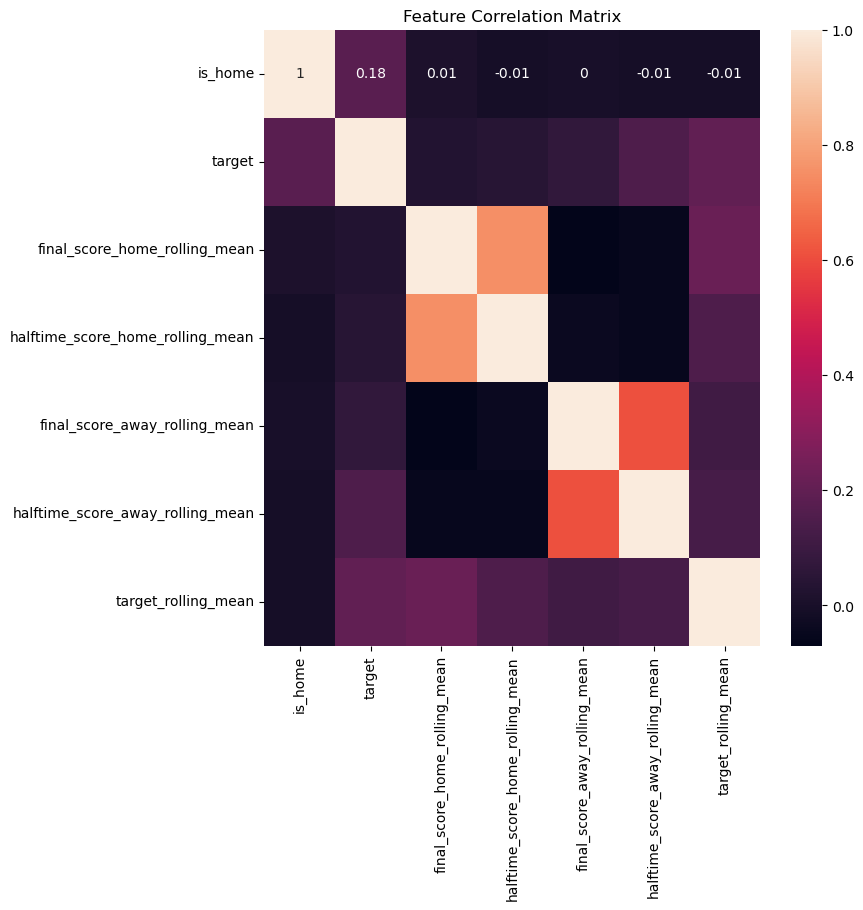

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(train_df.drop(columns=['day', 'month', 'year', 'hour', 'date', 'team_playing', 'opponent']).corr().round(2), annot=True)
plt.title('Feature Correlation Matrix')


In [ ]:
train_df.drop(columns=['day', 'month', 'year', 'hour', 'date']).columns

Index(['team_playing', 'opponent', 'is_home', 'target',
       'final_score_home_rolling_mean', 'halftime_score_home_rolling_mean',
       'final_score_away_rolling_mean', 'halftime_score_away_rolling_mean',
       'target_rolling_mean', 'Date'],
      dtype='object')

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_with_const = add_constant(train_df.drop(columns=['day', 'month', 'year', 'hour', 'date', 'target', 'team_playing', 'opponent']))

vif = pd.DataFrame()
vif["Variable"] = df_with_const.columns
vif["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

vif[vif['VIF']<5]['Variable'].values.tolist()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Choosing features. 

1. Features with high correlation to the target.
2. Minimal multicolinerality with the target.


Chosen:
- is_home : low multicolinearaoity and high correlation with target -> 0.12.



In [ ]:
# Prep X_train, y_train, X_test and y_test
# For simplicity, only going to use 4 features,

features = ['is_home', # If the team playing is home or not.
            'team_playing_ft_goals_rolling_mean', # full time goals rolling averages
            'team_playing_total_shots_rolling_mean', # rolling averages of total shots taken.
            'team_playing_corners_won_rolling_mean', # rolling averages of total corners won.
            'target_rolling_mean', # rolling averages of prev results.
            'opponent_fouls_committed_rolling_mean' # rolling averages of number of fouls won.
            ]

X_train = train_df[features]
y_train = train_df['target']

X_test = test_df[features]
y_test = test_df['target']

X_future = future_prediction[features]



X_train.to_csv('../data/LigaMX/X_train.csv', index = False)
y_train.to_csv('../data/LigaMX/y_train.csv', index = False)

X_test.to_csv('../data/LigaMX/X_test.csv', index = False)
y_test.to_csv('../data/LigaMX/y_test.csv', index = False)

X_future.to_csv('../data/LigaMX/X_future.csv', index = False)


KeyError: "['team_playing_ft_goals_rolling_mean', 'team_playing_total_shots_rolling_mean', 'team_playing_corners_won_rolling_mean', 'opponent_fouls_committed_rolling_mean'] not in index"

In [ ]:
test_df.drop(columns = ['Year', 'Month', 'Day', 'Hour', 'Referee']).reset_index(drop = True)[['team_playing', 'opponent']+features]

,team_playing,opponent,is_home,team_playing_ft_goals_rolling_mean,team_playing_total_shots_rolling_mean,team_playing_corners_won_rolling_mean,target_rolling_mean,opponent_fouls_committed_rolling_mean
0,Everton,West Ham,1,0.8,13.0,4.2,0.0,9.4
1,West Ham,Everton,0,1.0,12.6,3.0,0.2,10.8
2,Tottenham,Crystal Palace,1,2.0,15.0,8.4,0.4,11.4
3,Crystal Palace,Tottenham,0,1.8,11.4,6.4,0.4,10.8
4,Brentford,Chelsea,1,1.2,10.6,4.2,0.2,10.0
5,Chelsea,Brentford,0,1.6,11.8,5.0,0.4,11.2
6,Nott'm Forest,Liverpool,1,1.6,11.8,3.8,0.2,10.8
7,Liverpool,Nott'm Forest,0,3.2,21.4,8.0,0.8,11.6
8,Fulham,Brighton,1,1.6,15.8,8.4,0.4,9.4
9,Brighton,Fulham,0,2.2,15.0,6.8,0.4,11.6
